In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [7]:
# create time series
series = df[['date','price_per_sqft']]

In [9]:
series.set_index('date',inplace=True)

In [12]:
series.sort_index(ascending=True, inplace=True)

/var/folders/75/tr_v06ms4k7gy38vcppxbcf80000gn/T/ipykernel_81667/1678406489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.sort_index(ascending=True, inplace=True)


In [13]:
series

,price_per_sqft
date,
2014-05-02,222.081218
2014-05-02,303.846154
2014-05-02,239.361702
2014-05-02,167.673716
2014-05-02,203.703704
...,...
2015-05-14,156.410256
2015-05-14,262.043796
2015-05-15,240.641711


In [15]:
series = series.reset_index().groupby('date')['price_per_sqft'].mean()

In [16]:
series

date
2014-05-02    256.754752
2014-05-03    341.411634
2014-05-04    227.328921
2014-05-05    274.633319
2014-05-06    260.049332
                 ...    
2015-05-13    272.265782
2015-05-14    279.952207
2015-05-15    240.641711
2015-05-24    320.503597
2015-05-27    349.333333
Name: price_per_sqft, Length: 372, dtype: float64

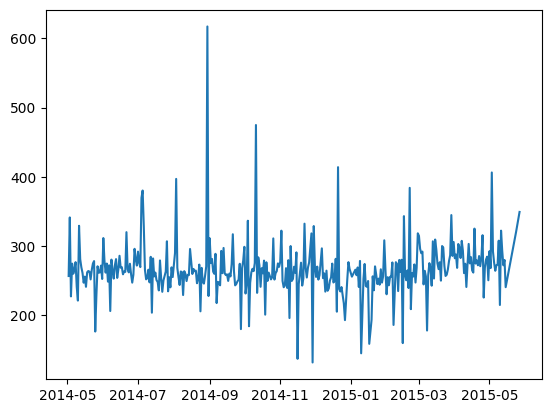

In [17]:
plt.plot(series)

In [19]:
series_df = series.to_frame()

In [21]:
series_df.reset_index(inplace=True)

In [22]:
series_df['month'] = series_df['date'].apply(lambda x: x.month)

In [24]:
series_df['year_month'] = series_df['date'].apply(lambda x: str(x.year) + str(x.month))

In [28]:
series_df.groupby('year_month')['price_per_sqft'].aggregate(['mean','std','min','max','median'])

,mean,std,min,max,median
year_month,,,,,
201410,268.064250,47.632868,184.206088,474.941358,261.906807
201411,259.798565,45.871800,131.836687,332.375425,261.458052
201412,257.361619,37.575478,193.044355,414.030372,253.703941
20145,261.147699,29.298717,176.542317,341.411634,261.990840
20146,269.108187,20.223170,206.192700,320.115733,267.727265
20147,268.474461,36.650429,203.782386,380.272198,256.823825
20148,274.639391,70.444858,205.762987,617.307692,262.355650
20149,262.553187,26.357387,180.039844,317.089916,260.398409
20151,247.498910,34.348491,145.089286,308.335684,254.421362


In [29]:
# assess seasonality

In [31]:
seasonal_df = series.to_frame()

In [44]:
seasonal_df

,price_per_sqft
date,
2014-05-02,256.754752
2014-05-03,341.411634
2014-05-04,227.328921
2014-05-05,274.633319
2014-05-06,260.049332
...,...
2015-05-13,272.265782
2015-05-14,279.952207
2015-05-15,240.641711


In [35]:
# monthly pivot
seasonal_df.pivot_table(values='price_per_sqft', index=seasonal_df.index.month, columns=seasonal_df.index.year, aggfunc='mean')

date,2014,2015
date,,
1,NaN,247.498910
2,NaN,260.974738
3,NaN,276.309772
4,NaN,279.324546
5,261.147699,290.966457
6,269.108187,NaN
7,268.474461,NaN
8,274.639391,NaN
9,262.553187,NaN


In [37]:
# average price per sqft across all the months within a quarter, to compare QoQ
seasonal_df.pivot_table(values='price_per_sqft', index=seasonal_df.index.day, columns=seasonal_df.index.quarter, aggfunc='mean')

date,1,2,3,4
date,,,,
1,272.572077,295.528763,291.764521,282.175148
2,268.957066,272.822834,280.245101,269.732701
3,266.554217,319.501070,316.082858,255.368335
4,273.809919,274.370114,300.429350,276.249872
5,255.494263,274.348495,298.510044,228.344813
6,266.160527,269.833453,287.111243,264.003351
7,237.067692,263.135116,248.825001,266.085450
8,209.471311,280.865149,254.208428,266.850752
9,271.121573,268.715346,243.377571,240.142768


In [46]:
seasonal_df.pivot_table(values='price_per_sqft', index=seasonal_df.index.month, columns=seasonal_df.index.year, aggfunc='mean')

date,2014,2015
date,,
1,NaN,247.498910
2,NaN,260.974738
3,NaN,276.309772
4,NaN,279.324546
5,261.147699,290.966457
6,269.108187,NaN
7,268.474461,NaN
8,274.639391,NaN
9,262.553187,NaN


In [40]:
# average price per sqft across all each weekday, to compare Month over Month
seasonal_df.pivot_table(values='price_per_sqft', index=seasonal_df.index.weekday, columns=seasonal_df.index.month, aggfunc='mean')

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
0,239.082399,284.036104,281.260663,283.481539,277.147331,269.220090,264.108270,266.002204,269.843506,264.701941,262.307853,253.723456
1,263.705841,258.050515,280.529572,283.841513,272.127154,264.695420,254.890542,254.177812,260.815415,261.214097,254.767769,260.382554
2,248.701490,253.676730,271.384774,285.984551,275.285051,266.442654,262.078790,253.188418,254.931576,266.572511,261.900726,251.932166
3,252.335481,262.017295,257.583721,267.045340,267.296863,260.114939,259.709183,256.166215,266.365051,259.012097,260.385419,255.212487
4,270.239982,261.779332,274.934310,272.066328,263.334886,261.901154,282.206360,270.878071,257.051552,260.835827,268.176673,248.132102
5,203.868159,292.237400,274.025069,296.242075,272.958834,272.196089,301.916756,337.412560,283.648348,336.384303,262.412602,228.562948
6,252.998263,199.709475,288.988050,268.015273,276.720910,285.148828,261.597545,270.845874,243.828720,232.172049,250.465407,320.292798


In [38]:
# average price per sqft across all each month, to compare Month over Month
seasonal_df.pivot_table(values='price_per_sqft', index=seasonal_df.index.day, columns=seasonal_df.index.month, aggfunc='mean')

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,NaN,230.408870,314.735285,282.394577,292.590078,311.601634,291.977877,272.010998,311.304687,298.949936,277.259867,270.315641
2,255.844461,255.056715,295.970021,287.924141,262.484861,278.397472,275.399621,289.944159,275.391522,231.486366,322.265625,255.446113
3,NaN,243.384709,289.723726,268.549606,373.883149,261.688376,269.707140,397.058824,281.482609,246.097606,249.663598,270.343801
4,NaN,255.577649,292.042190,303.058058,259.837143,274.748110,369.694960,268.519432,263.073656,336.630342,240.553032,251.566240
5,265.906714,255.926703,244.649373,298.020767,275.341310,248.690592,380.272198,255.293547,259.964386,184.206088,242.728161,258.100190
6,257.904892,276.335085,264.241605,282.767250,262.170373,272.225815,328.675178,243.827695,288.830854,246.779829,268.065968,277.164254
7,269.116275,186.060502,256.026299,307.567848,269.389958,206.192700,265.531738,263.264649,217.678616,261.906807,239.633689,296.715854
8,240.932152,NaN,178.010471,293.168454,274.913174,280.465796,251.974635,262.355650,248.295000,267.188996,279.659319,253.703941
9,278.529537,276.732951,258.102229,260.913777,274.480879,264.985848,253.606066,229.277753,247.248893,263.808168,196.036072,260.584065


In [ ]:
# average price per sqft across all each weekday, to compare Month over Month
seasonal_df.pivot_table(values='price_per_sqft', index=seasonal_df.index.weekday, columns=seasonal_df.index.month, aggfunc='mean')

In [49]:
seasonal_df.reset_index(inplace=True)

In [50]:
seasonal_df['month_year'] = seasonal_df['date'].apply(lambda x: str(x.year)+str(x.month))

In [53]:
season_2014 = seasonal_df[seasonal_df['month_year']<'20151'].drop('month_year',axis=1)

In [55]:
season_2014.set_index('date', inplace=True)

In [59]:
weekday_df_2014 = season_2014.pivot_table(values='price_per_sqft', index=season_2014.index.weekday, columns=season_2014.index.month, aggfunc='mean')

<Axes: xlabel='date'>

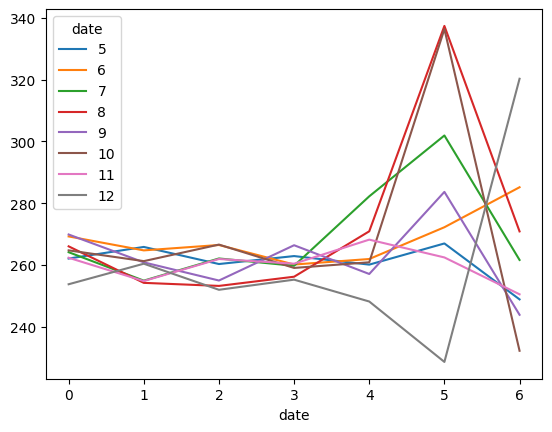

In [62]:
weekday_df_2014.plot()

In [63]:
# check for autocorrelation
series

date
2014-05-02    256.754752
2014-05-03    341.411634
2014-05-04    227.328921
2014-05-05    274.633319
2014-05-06    260.049332
                 ...    
2015-05-13    272.265782
2015-05-14    279.952207
2015-05-15    240.641711
2015-05-24    320.503597
2015-05-27    349.333333
Name: price_per_sqft, Length: 372, dtype: float64

In [64]:
# convert to a dataframe
corr_df = series.to_frame()

In [66]:
corr_df['price_1lag'] = corr_df['price_per_sqft'].shift(1)

In [67]:
corr_df

,price_per_sqft,price_1lag
date,,
2014-05-02,256.754752,NaN
2014-05-03,341.411634,256.754752
2014-05-04,227.328921,341.411634
2014-05-05,274.633319,227.328921
2014-05-06,260.049332,274.633319
...,...,...
2015-05-13,272.265782,293.450400
2015-05-14,279.952207,272.265782
2015-05-15,240.641711,279.952207


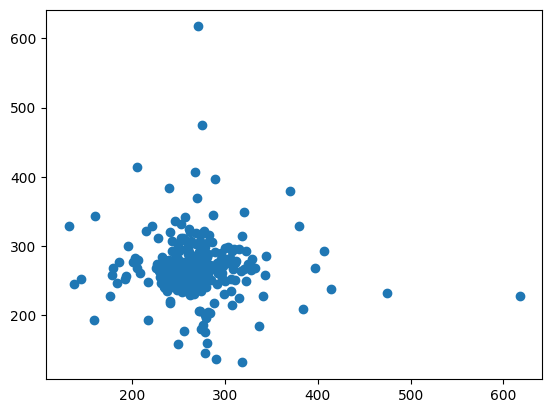

In [68]:
plt.scatter(corr_df['price_1lag'],corr_df['price_per_sqft'])

In [69]:
corr_df['price_30lag'] = corr_df['price_per_sqft'].shift(30)

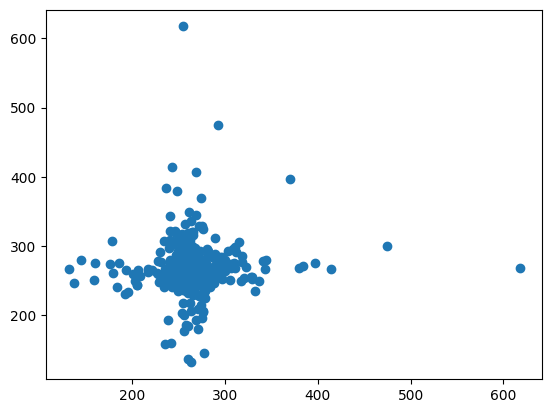

In [70]:
plt.scatter(corr_df['price_30lag'],corr_df['price_per_sqft'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

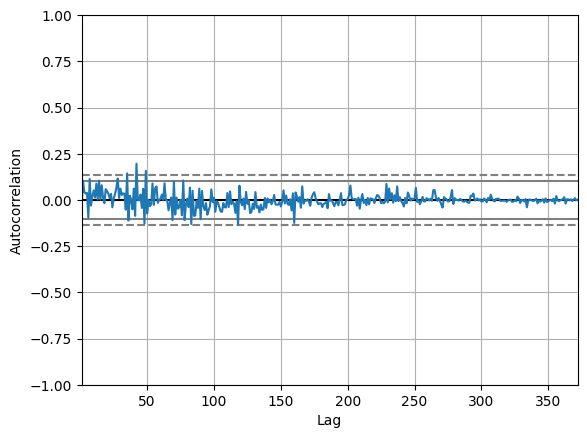

In [73]:
pd.plotting.autocorrelation_plot(corr_df['price_per_sqft'])

In [75]:
df['month'] = df['date'].apply(lambda x: x.month)